# 行列の導入

## 学ぶこと

- NumPy配列の結合：concatenate, stack
- NumPy配列のshapeとaxis, 集約関数
- 行列積の導入

## 配列の結合

### concatenate

In [1]:
a = [1, 2, 3]
b = [100, 101, 102]
a + b

[1, 2, 3, 100, 101, 102]

In [2]:
a.append(b)
a

[1, 2, 3, [100, 101, 102]]

In [3]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([100, 101, 102])

# numpyでは関数を使う
np.concatenate([x, y])

array([  1,   2,   3, 100, 101, 102])

In [4]:
np.concatenate([x, x, y])

array([  1,   2,   3,   1,   2,   3, 100, 101, 102])

In [5]:
np.concatenate([x] * 4)

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

In [6]:
np.array([x] * 4)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### ベストプラクティス

appendを使ってリストにためてからnp.arrayを適用するのと，np.concatenateでNumpy配列を結合するのではどちらが早いのだろうか?

In [7]:
from mypy.mymodule import TimeExecute

chunk_size = 100
def pattern1():
    x = []
    for i in range(10000):
        for j in range(chunk_size):
            x.append(j)
    x= np.array(x)

def pattern2():
    x = []
    for i in range(10000):
        x += list(range(chunk_size))
    x = np.array(x)

def pattern3():
    x = []
    for i in range(10000):
        x.append(np.arange(chunk_size))
    x = np.concatenate(x)

def pattern4():
    x = np.array([])
    for i in range(10000):
        x = np.concatenate([x, np.arange(chunk_size)])

In [8]:
with TimeExecute():
    pattern1()

114.722 [msec]


In [9]:
with TimeExecute():
    pattern2()

85.800 [msec]


In [10]:
with TimeExecute():
    pattern3()

15.957 [msec]


In [11]:
with TimeExecute():
    pattern4()

13,534.473 [msec]


基本的にはpattern3, つまりNumPy配列をリストに入れる作業の後に，
まとめて結合させるのが良い．
chunk_sizeが小さい場合には他のpatternが優勢なときもある. 

配列は要素の結合などのように素数が変化する処理には向いていないため，
結合回数を少なくすることがよい. 


## NumPy配列の分割


### スライス

普通に働くので省略.

### np.split

あまり使う機会はあにが指定した数に要素を当分する. 

In [12]:
x    = np.arange(8)
a, b = np.split(x, 2)
print(a)
print(b)

[0 1 2 3]
[4 5 6 7]


## 多次元リストと多次元配列

In [13]:
x = np.array([np.arange(1, 4)] * 4) + np.array(np.arange(4) * 10).reshape(4, 1)
x

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [14]:
# 1行目
x[0]

array([1, 2, 3])

In [15]:
# 1列目
x[:, 0]

array([ 1, 11, 21, 31])

In [16]:
# 1要素
x[0,0], x[0][0]

(1, 1)

In [17]:
# 1要素を配列で
x[0, 0:1]

array([1])

### 行列の積み上げ

np.concatenateは末尾への結合であったが，np.stackは配列を積み重ねていくことが可能である. 


In [18]:
x1 = np.arange(3)
x2 = 3 + np.arange(3)
np.concatenate([x1, x2])

array([0, 1, 2, 3, 4, 5])

In [19]:
np.stack([x1, x2])

array([[0, 1, 2],
       [3, 4, 5]])

## 多次元配列のスライスの解釈

In [20]:
anko_sell = np.array([[100, 50, 50], [50, 30, 100],[50, 50, 70], [100, 50, 100]])
anko_sell

array([[100,  50,  50],
       [ 50,  30, 100],
       [ 50,  50,  70],
       [100,  50, 100]])

In [21]:
anko_sell[0, ]

array([100,  50,  50])

In [22]:
anko_sell[:, 0]

array([100,  50,  50, 100])

In [23]:
anko_sell[::2, ::]

array([[100,  50,  50],
       [ 50,  50,  70]])

### 行と列が反転したときのスライス

In [24]:
annko_vertical = anko_sell.T
annko_vertical

array([[100,  50,  50, 100],
       [ 50,  30,  50,  50],
       [ 50, 100,  70, 100]])

### スライスと識別子

スライスしたときに作成されるのは元の変数のViewである．

スライスで作ったViewと元の変数は識別しが異なる，ということになる.

ただし配列を抜けるとそれは数値になるので，そこでも識別子は異なる. 


In [25]:
x = np.arange(5)
print(id(x[::]))
print(id(x[:]))
print(id(x))


2627982381584
2627982381584
2627982384544


In [26]:
x = np.array([[1, 2, 3], [11, 12, 13], [21, 22, 23]])
print(id(x[1,::]))
print(id(x[1,:]))
print(id(x[1,1]))
print(id(x[1]))

2627982384544
2627982384544
2627981811504
2627982384544


## NumPy配列のshape

In [27]:
x = np.arange(5)
print(x.shape)
print(len(x))

(5,)
5


In [28]:
x = np.array([[1,2], [3,4], [5,6]])
print(x.shape)
print(len(x))

(3, 2)
3


## 集約関数


In [29]:
x = np.array([16, 12, 12, 11, 11])
print(np.sum(x)) # 62
print(np.prod(x)) # 278784p
ｐrint(np.mean(x)) # 12.4
print(np.std(x)) # 1.8547236990991407
print(np.median(x)) # 12.0
print(len(x)) # 5
print(np.max(x)) # 16
print(np.min(x)) # 11
print(np.argmax(x)) 
print(np.argmin(x))

62
278784
12.4
1.8547236990991407
12.0
5
16
11
0
3


集約関数ではないが，いわゆる最大値の管理，最小値の管理とう面で活用出来るのがnp.maxmium/minimumである．これらの関数はnp.clipと等価である. 

In [30]:
x = np.arange(10)
print(np.maximum(np.minimum(x, 7), 3)) # [3 3 3 3 4 5 6 7 7 7]
print(np.minimum(np.maximum(x, 3), 7))

[3 3 3 3 4 5 6 7 7 7]
[3 3 3 3 4 5 6 7 7 7]


In [31]:
np.clip(x, 3, 7)

array([3, 3, 3, 3, 4, 5, 6, 7, 7, 7])

## 多次元配列と集約関数のaxis

In [32]:
anko_sell = np.array(
    [[100, 50, 50], [50, 30, 100],[50, 50, 70], [100, 50, 100]])
print(np.sum(anko_sell)) 

800


In [33]:
# 月単位
print("月単位", np.sum(anko_sell, axis = 1))

月単位 [200 180 170 250]


In [34]:
# 商品単位
print("商品単位", np.sum(anko_sell, axis = 0))


商品単位 [300 180 320]


## 多次元配列の次元

numpy配列の次元とは`len(x.shape)`である.


## 多次元配列化出来ない「リストのリスト」

リストのリストは通常，NumPyヘア塚しても多次元配列にはならないが，入れ子になった内側のリストの要素数が全て同じ，つまり多次元リストに限定すれば多次元配列となる. 

とはいえ，下記とおり思わぬエラーが発生するもとであるので，基本的にはリストのリストか直接多次元配列を作成することはやめておいた方が良い. 


In [35]:
x = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(x)
x = np.array(x)
print(x) # エラーにはならないが、多次元配列ではない
print(x.dtype) # object型になる
print(x.shape) # あたかも1次元配列のようにみなされる
print(x[:, 1]) # これはエラー

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]
[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]
object
(3,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## 配列の結合でのaxis

## 行列の導入

In [37]:
sell_amount = np.array([[20, 10, 15], [15, 15, 20],[30, 25, 25]])
price = np.array([120, 120, 180])
print(price.shape) # (3, )
p = np.expand_dims(price, axis=-1) # 行列にするために軸を増やす。要素数1の軸を作る
print(p.shape) # (3, 1) これで行列になる
result = np.dot(sell_amount, p) # (3, 3) x (3, 1)の行列積
print(result.shape) # (3, 1)
result = result[:, 0] # 末尾の軸がいらないのでスライス
print(result.shape) # (3, ) ベクトルに戻ったprint(result

(3,)
(3, 1)
(3, 1)
(3,)


## 演習問題

### q1:np.concatenate

In [41]:
a = np.arange(5)
b = np.arange(3)
np.concatenate([a, b])

array([0, 1, 2, 3, 4, 0, 1, 2])

In [42]:
a = np.arange(5)
b = 0
np.concatenate([a, b])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [44]:
a = np.arange(5)
b = np.arange(7)
np.concatenate([a,b], axis = 0)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6])

In [45]:
np.concatenate([a, b], axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [47]:
np.concatenate([np.arange(9) for _ in range(10)])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6,
       7, 8])

### q2:np.stack


In [48]:
np.stack([np.arange(5) for i in range(2)], axis = 0)

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [49]:
np.vstack([np.arange(5) for i in range(2)])

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [50]:
np.stack([np.arange(5) for i in range(2)], axis = 1)

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [52]:
np.stack([np.arange(i + 2) for i in range(4)], axis = 0)

ValueError: all input arrays must have the same shape

In [54]:
np.stack([np.arange(2) for _ in range(8)], axis = 2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [55]:
np.stack([np.arange(2) for _ in range(8)], axis = -1)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [56]:
np.stack([np.arange(2) for _ in range(8)], axis = -2)

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [57]:
np.stack([np.arange(2) for _ in range(8)], axis = -3)

AxisError: axis -3 is out of bounds for array of dimension 2

### q3:スライスのshape

In [59]:
np.random.seed(123)
A = np.random.randn(16, 12)
A.shape

(16, 12)

In [60]:
A[3] 

array([ 0.00284592,  0.68822271, -0.87953634,  0.28362732, -0.80536652,
       -1.72766949, -0.39089979,  0.57380586,  0.33858905, -0.01183049,
        2.39236527,  0.41291216])

In [61]:
A[:, 2]

array([ 0.2829785 , -0.44398196,  0.9071052 , -0.87953634, -1.29408532,
        0.31427199, -2.12310035, -0.73246199,  0.37940061, -0.4276796 ,
        0.12074736,  0.76094939,  0.4562709 ,  1.37725748, -1.04899168,
        1.39535293])

In [63]:
A[1:3, :].shape

(2, 12)

In [64]:
A[2:3, 4:8].shape

(1, 4)

In [67]:
A[4,6:7].shape

(1,)

In [69]:
A[::2, ::2].shape

(8, 6)

In [70]:
A[2::3, 1::4].shape

(5, 3)

In [71]:
A[-5::, -7:-4:2].shape

(5, 2)

### q4:ベクトルの結合

In [77]:
from mypy.mymodule import TimeExecute
N = 10000
with TimeExecute():
    x = []
    for i in np.arange(1, N + 1):
        x.append(np.full((i,), i))
    y = np.concatenate(x)

200.463 [msec]


### q5:ベクトルの行列化（１）

In [81]:
jan = np.array([100, 50, 50])
feb = np.array([50, 30, 100])

# ベクトルの場合のaxisの指定は，
# 指定された軸がゼロになるイメージで，そこに対してstackされる
sells = np.stack([jan, feb], axis = 0)
sells

array([[100,  50,  50],
       [ 50,  30, 100]])

### q6:ベクトルの行列化

In [83]:
koshian = np.array([100, 50])
tsubuan = np.array([50, 30])
kurian  = np.array([50, 100])

sells = np.stack([koshian, tsubuan, kurian], axis = 1)
sells

array([[100,  50,  50],
       [ 50,  30, 100]])

### q8:分散と標準偏差

In [84]:
x = np.arange(100) ** 2

x_mean = np.mean(x)
x_mean

3283.5

In [86]:
np.var(x), np.mean((x - x_mean) ** 2)

(8721961.05, 8721961.05)

In [87]:
np.std(x), np.sqrt(np.mean((x - x_mean) ** 2))

(2953.2966410436998, 2953.2966410436998)

### q9:平均値と中央時

In [88]:
data_file = "numpy_book/data/income.npz"
income = np.load(data_file)["income"]
income

array([ 675,  777, 1166, ...,  279,  315,  232])

In [91]:
np.mean(income), \
np.median(income), \
np.sum(income >= np.mean(income)) / len(income)

(555.0538, 426.0, 0.3805)

### q10: ポケモンの分析

In [38]:
data_file = "numpy_book/data/pokemon.npz"
pokemon   = np.load(data_file, allow_pickle = True)
for k, v in pokemon.items():
    print(k, v)

params [[ 45  49  49  65  65  45]
 [ 60  62  63  80  80  60]
 [ 80  82  83 100 100  80]
 [ 39  52  43  60  50  65]
 [ 58  64  58  80  65  80]
 [ 78  84  78 109  85 100]
 [ 44  48  65  50  64  43]
 [ 59  63  80  65  80  58]
 [ 79  83 100  85 105  78]
 [ 45  30  35  20  20  45]
 [ 50  20  55  25  25  30]
 [ 60  45  50  90  80  70]
 [ 40  35  30  20  20  50]
 [ 45  25  50  25  25  35]
 [ 65  90  40  45  80  75]
 [ 40  45  40  35  35  56]
 [ 63  60  55  50  50  71]
 [ 83  80  75  70  70 101]
 [ 30  56  35  25  35  72]
 [ 55  81  60  50  70  97]
 [ 40  60  30  31  31  70]
 [ 65  90  65  61  61 100]
 [ 35  60  44  40  54  55]
 [ 60  95  69  65  79  80]
 [ 35  55  40  50  50  90]
 [ 60  90  55  90  80 110]
 [ 50  75  85  20  30  40]
 [ 75 100 110  45  55  65]
 [ 55  47  52  40  40  41]
 [ 70  62  67  55  55  56]
 [ 90  92  87  75  85  76]
 [ 46  57  40  40  40  50]
 [ 61  72  57  55  55  65]
 [ 81 102  77  85  75  85]
 [ 70  45  48  60  65  35]
 [ 95  70  73  95  90  60]
 [ 38  41  40  50  65

### q11:種族値合計

- params:種族値
- params_header:種族値のヘッダー
- names:ポケモンの名前
- numbers:ポケモン図鑑No.



In [39]:
total_params = np.sum(pokemon["params"], axis = 1)
print(f"""
平均 = {np.mean(total_params)}, 
最大 = {np.max(total_params)}, 
最小 = {np.min(total_params)}, 
中央値 = {np.median(total_params)}""")


平均 = 407.6423841059603, 
最大 = 680, 
最小 = 195, 
中央値 = 405.0


### q12:種族値の集約

In [40]:
for i, v in enumerate(pokemon["params_header"]):
    print(f"{v}")
    data = pokemon["params"][:, i]
    print(f"""
    平均 = {np.mean(data)}, 
    最大 = {np.max(data)}, 
    最小 = {np.min(data)}, 
    中央値 = {np.median(data)}""")  
    print("-"* 10)

HP

    平均 = 64.21192052980132, 
    最大 = 250, 
    最小 = 10, 
    中央値 = 60.0
----------
攻撃

    平均 = 72.91390728476821, 
    最大 = 134, 
    最小 = 5, 
    中央値 = 70.0
----------
防御

    平均 = 68.2251655629139, 
    最大 = 180, 
    最小 = 5, 
    中央値 = 65.0
----------
特攻

    平均 = 67.13907284768212, 
    最大 = 154, 
    最小 = 15, 
    中央値 = 65.0
----------
特防

    平均 = 66.08609271523179, 
    最大 = 125, 
    最小 = 20, 
    中央値 = 65.0
----------
素早

    平均 = 69.06622516556291, 
    最大 = 150, 
    最小 = 15, 
    中央値 = 70.0
----------


### q13:種族値のランキング

`np.argsort`により，ソート結果がインデックスで表示されるので，わたしがやっているようにわざわざ構造体の
配列を作成して処理行う必要はなかった。

とはいえ，いい勉強になった気がする. 



In [41]:
dtype  = [("name", "U10"), ("param", int)]
values = [(x, y) for x, y in zip(pokemon["names"], total_params)]
tbl = np.array(values, dtype = dtype)


In [42]:
tbl.sort(order = "param")

In [43]:
# worst 10
tbl[:10]

array([('キャタピー', 195), ('ビードル', 195), ('コイキング', 200), ('コクーン', 205),
       ('トランセル', 205), ('ズバット', 245), ('ポッポ', 251), ('コラッタ', 253),
       ('オニスズメ', 262), ('ディグダ', 265)],
      dtype=[('name', '<U10'), ('param', '<i4')])

In [44]:
# top10
tbl[-10:]

array([('ラプラス', 535), ('カビゴン', 540), ('ギャラドス', 540), ('ウインディ', 555),
       ('サンダー', 580), ('ファイヤー', 580), ('フリーザー', 580), ('カイリュー', 600),
       ('ミュウ', 600), ('ミュウツー', 680)],
      dtype=[('name', '<U10'), ('param', '<i4')])

In [45]:
hensachi = (total_params - np.mean(total_params)) * 10 / np.std(total_params) + 50
np.min(hensachi), np.max(hensachi)

(28.638341700682517, 77.36053938826282)

### q15: 偏差値ソート

In [46]:
dtype  = [("name", "U10"), ("param", float)]
values = [(x, y) for x, y in zip(pokemon["names"], hensachi)]
tbl = np.array(values, dtype = dtype)
tbl.sort(order = "param")
tbl[:10], tbl[-10:]

(array([('キャタピー', 28.6383417 ), ('ビードル', 28.6383417 ),
        ('コイキング', 29.1406324 ), ('コクーン', 29.6429231 ),
        ('トランセル', 29.6429231 ), ('ズバット', 33.66124868),
        ('ポッポ', 34.26399752), ('コラッタ', 34.4649138 ),
        ('オニスズメ', 35.36903705), ('ディグダ', 35.67041147)],
       dtype=[('name', '<U10'), ('param', '<f8')]),
 array([('ラプラス', 62.79410915), ('カビゴン', 63.29639985),
        ('ギャラドス', 63.29639985), ('ウインディ', 64.80327194),
        ('サンダー', 67.31472543), ('ファイヤー', 67.31472543),
        ('フリーザー', 67.31472543), ('カイリュー', 69.32388822),
        ('ミュウ', 69.32388822), ('ミュウツー', 77.36053939)],
       dtype=[('name', '<U10'), ('param', '<f8')]))

In [47]:
v = pokemon["params"]
hensachi2 = (v - np.mean(v, axis = 0, keepdims=True)) * 10  / np.std(v, axis = 0, keepdims=True) + 50
for i in np.arange(len(v)):
    v = np.sort(hensachi2[:, i])
    print(v[:10], v[-10:])

[30.97512971 34.48448155 36.23915747 36.23915747 37.99383338 37.99383338
 37.99383338 37.99383338 37.99383338 37.99383338] [ 64.31397216  64.31397216  64.31397216  64.66490734  67.823324
  73.08735175  73.08735175  76.59670359  83.61540726 115.19957379]
[24.53229698 26.40729609 30.15729429 30.15729429 32.03229339 33.90729249
 33.90729249 35.78229159 35.78229159 35.78229159] [65.7822772  67.6572763  67.6572763  69.5322754  69.5322754  71.4072745
 71.4072745  71.4072745  71.4072745  72.90727378]
[26.43263987 30.16016829 32.0239325  33.8876967  35.75146091 35.75146091
 35.75146091 35.75146091 37.61522512 37.61522512] [65.57168825 67.43545246 67.43545246 67.43545246 69.29921666 69.29921666
 71.16298087 73.02674508 84.20933033 91.66438717]
[31.6667079  33.42482241 33.42482241 33.42482241 35.18293692 35.18293692
 35.18293692 35.18293692 36.94105143 36.94105143] [66.82899809 66.82899809 68.5871126  68.5871126  70.34522711 70.34522711
 70.34522711 72.10334162 73.86145613 80.54229127]
[30.89972

IndexError: index 6 is out of bounds for axis 1 with size 6

In [48]:
total_hensachi = np.sum(hensachi2, axis = 1)
total_hensachi

array([266.98670102, 299.40429343, 344.12475328, 263.22003676,
       298.79723743, 346.6823034 , 265.79349106, 299.74828355,
       346.5409814 , 220.16999211, 223.89110947, 295.41238503,
       220.28287432, 224.00399168, 296.34781708, 241.47904633,
       277.82687269, 326.259979  , 242.65493362, 302.69998443,
       245.50993826, 312.69971633, 256.10173332, 315.75230634,
       267.5884241 , 329.00172699, 259.72545478, 315.6260296 ,
       250.22749063, 283.76783552, 336.38276957, 249.6874199 ,
       283.97327047, 335.95995755, 268.41656752, 327.83337136,
       260.32633   , 337.18064313, 246.35035403, 307.52527238,
       239.55814096, 317.8189457 , 267.54547722, 295.39914637,
       330.59939705, 254.9866355 , 299.94568838, 261.938432  ,
       315.50231661, 247.73349359, 307.61783579, 256.0686326 ,
       311.96920741, 266.98955604, 334.07024582, 262.08245686,
       317.98303168, 277.99040793, 354.29585927, 259.8073959 ,
       291.18529885, 338.57632737, 263.04675511, 296.58

In [49]:
dtype  = [("name", "U10"), ("param", float)]
values = [(x, y) for x, y in zip(pokemon["names"], total_hensachi)]
tbl = np.array(values, dtype = dtype)
tbl.sort(order = "param")
tbl[:10], tbl[-10:]

(array([('キャタピー', 220.16999211), ('ビードル', 220.28287432),
        ('コイキング', 222.58782106), ('トランセル', 223.89110947),
        ('コクーン', 224.00399168), ('ズバット', 239.55814096),
        ('ポッポ', 241.47904633), ('コラッタ', 242.65493362),
        ('オニスズメ', 245.50993826), ('プリン', 246.35035403)],
       dtype=[('name', '<U10'), ('param', '<f8')]),
 array([('ラプラス', 346.90637896), ('カビゴン', 349.2644539 ),
        ('ギャラドス', 350.32911051), ('ウインディ', 354.29585927),
        ('ファイヤー', 363.2798768 ), ('サンダー', 363.45099885),
        ('フリーザー', 365.55530159), ('ミュウ', 371.65554495),
        ('カイリュー', 371.95806505), ('ミュウツー', 399.76472594)],
       dtype=[('name', '<U10'), ('param', '<f8')]))

### q18：コサイン類似度

In [63]:
idx_purin, *_ = np.where(pokemon["names"] == "プリン")
idx_purin

array([38], dtype=int64)

In [54]:
params = pokemon["params"]
params_norm = np.sqrt(np.sum(params * params, axis = 1))
params_norm

array([131.53706702, 166.77229986, 215.43676566, 128.05858035,
       166.88019655, 219.84085153, 130.03845585, 166.85023224,
       217.86234186,  83.51646544,  89.86100378, 165.90660023,
        83.81527307,  87.32124598, 167.25728684, 103.97595876,
       143.64887748, 197.26885208, 110.88282103, 173.1906464 ,
       113.67497526, 184.36919482, 119.59096956, 185.07295859,
       137.65899898, 203.2855135 , 135.09256086, 192.35384062,
       113.22102278, 149.72975656, 206.78249442, 112.53888217,
       149.76314633, 207.28965242, 135.19985207, 199.94749311,
       125.19984026, 208.06489372, 136.74794331, 195.63997547,
       101.85774394, 186.74849397, 135.27749258, 164.84841522,
       204.81699148, 121.75795662, 172.98843892, 125.59856687,
       185.87630295, 126.58988901, 188.48076825, 127.08265027,
       185.47236991, 131.36970731, 204.59227747, 131.81426326,
       190.72231123, 144.74114826, 228.08989456, 130.3840481 ,
       160.54594358, 209.88091862, 152.97058541, 184.52

In [69]:
params_inner_dot = np.sum(params * params[idx_purin, :], axis = 1)

In [70]:
cos_norm = params_inner_dot / params_norm / params_norm[idx_purin]
cos_norm

array([0.76775866, 0.77831184, 0.78579701, 0.73864701, 0.76838728,
       0.77637519, 0.74399024, 0.75844481, 0.76630726, 0.83401157,
       0.82191954, 0.76584406, 0.80050142, 0.81651448, 0.78042715,
       0.7732884 , 0.81272924, 0.79941104, 0.6667547 , 0.72244497,
       0.73786642, 0.75737419, 0.72490712, 0.75291367, 0.66933747,
       0.73024536, 0.71859186, 0.76129129, 0.84610336, 0.83759717,
       0.82222066, 0.80932011, 0.80786913, 0.80592149, 0.8686574 ,
       0.85069317, 0.71199858, 0.75424095, 1.        , 0.9765127 ,
       0.77357499, 0.79197344, 0.76355813, 0.78628622, 0.78994434,
       0.73122464, 0.7640828 , 0.84132222, 0.78290352, 0.5040175 ,
       0.61786215, 0.68620096, 0.73630981, 0.79740434, 0.80153485,
       0.72120735, 0.75725961, 0.80710131, 0.81113599, 0.68705392,
       0.77433481, 0.81269557, 0.57246217, 0.63506573, 0.67008084,
       0.87403272, 0.84195341, 0.81770504, 0.82070661, 0.82513189,
       0.8216333 , 0.65587028, 0.75596467, 0.65344228, 0.70079

In [71]:
dtype  = [("name", "U10"), ("param", float)]
values = [(x, y) for x, y in zip(pokemon["names"], cos_norm)]
tbl = np.array(values, dtype = dtype)
tbl.sort(order = "param")
tbl[:10], tbl[-10:]

(array([('コイキング', 0.47167065), ('イワーク', 0.50117967), ('ディグダ', 0.5040175 ),
        ('ケーシィ', 0.57246217), ('クラブ', 0.60349924), ('パルシェン', 0.60613781),
        ('ダグトリオ', 0.61786215), ('シェルダー', 0.62124011),
        ('バリヤード', 0.62707092), ('コイル', 0.62835978)],
       dtype=[('name', '<U10'), ('param', '<f8')]),
 array([('ベロリンガ', 0.86984039), ('ワンリキー', 0.87403272),
        ('ベトベター', 0.89658695), ('ラッキー', 0.90150245), ('ラプラス', 0.9049524 ),
        ('シャワーズ', 0.90520822), ('ヤドン', 0.91452425), ('カビゴン', 0.92984708),
        ('プクリン', 0.9765127 ), ('プリン', 1.        )],
       dtype=[('name', '<U10'), ('param', '<f8')]))

なんかすべてのポケモンをまとめて計算出来そうな気がする. 

In [72]:
# ポケモン vs ポケモン のノルム表
inner_prd = np.sum(params[np.newaxis, :, :] * params[:, np.newaxis, :], axis = 2)
inner_prd.shape

(151, 151)

In [82]:
norms = np.outer(params_norm, params_norm)

In [85]:
cos_norm = inner_prd / norms

In [88]:
cos_norm[idx_purin, :5]

array([[0.76775866, 0.77831184, 0.78579701, 0.73864701, 0.76838728]])

### q19:画像入門

In [90]:
img = np.zeros((400, 400), dtype = np.uint8)


In [91]:
import matplotlib.pyplot as plt

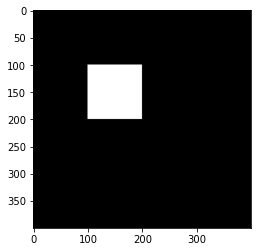

In [93]:
img[100:200, 100:200] = 255
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

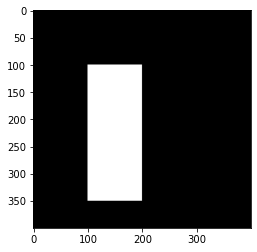

In [95]:
img[200:350, 100:200] = 255
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

### q20:行列積の可換性


In [96]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[-4, -3, -2], [-1, 0, 1], [2, 3, 4]])

In [97]:
A.dot(B)

array([[  0,   6,  12],
       [ -9,   6,  21],
       [-18,   6,  30]])

In [98]:

B.dot(A)

array([[-30, -39, -48],
       [  6,   6,   6],
       [ 42,  51,  60]])

### q22:あんこ商店

In [103]:
data_file = "numpy_book/data/anko_shop.npz"
anko_sell = np.load(data_file)["sell"]
anko_sell.shape

(100, 4)

In [109]:
nontax_price = np.diag([120, 180, 270, 120])
nontax_price

array([[ 120,    0,    0,    0],
       [   0,  180,    0,    0],
       [   0,    0,  270,    0],
       [   0,    0,    0, 1200]])

In [111]:
anko_sell.dot(nontax_price).sum()

287970

### q23:アファイン変換入門

In [113]:
character = np.load("numpy_book/data/ankochan.npz")["points"]
print(character.shape)

(2, 3465)


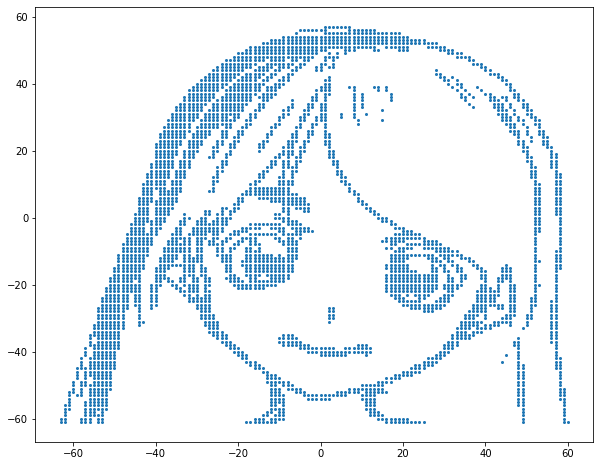

In [115]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca()
ax.plot(
    character[0], 
    character[1], 
    linewidth = 0, 
    markersize = 2, 
    marker = "o"
)
plt.show()

### q24:アファイン変換ー回転

In [121]:
def gen_pmat(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([c, -s, s, c]).reshape((2, 2))



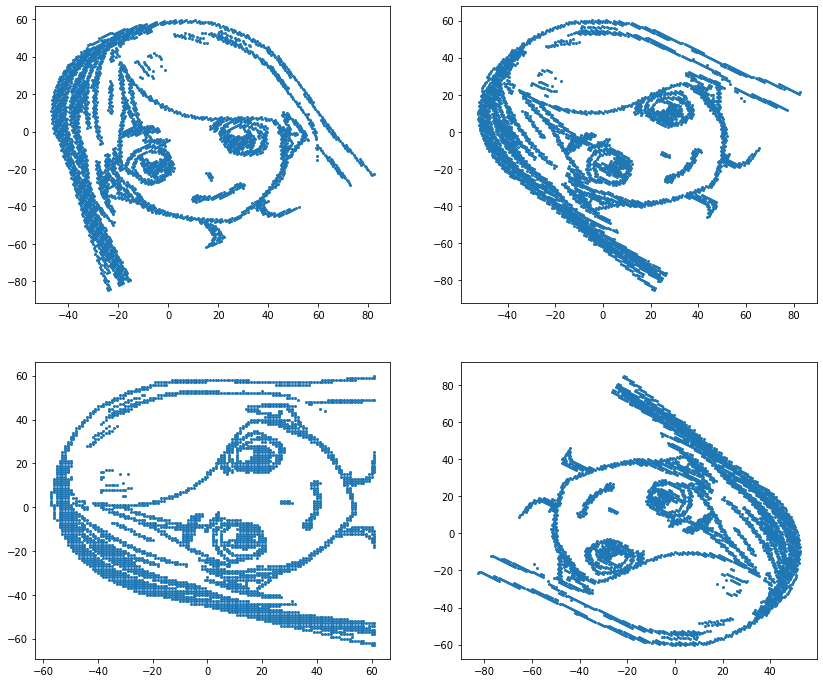

In [122]:
thetas = [np.pi / 6, np.pi / 3, np.pi / 2, 4 * np.pi / 3]

fig = plt.figure(figsize = (14, 12))

for i, theta in enumerate(thetas):
    rotated_points = np.dot(gen_pmat(theta), character)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(
        rotated_points[0], 
        rotated_points[1], 
        linewidth = 0, 
        markersize = 2, 
        marker = "o"
    )
plt.show()

### q25: せん断変形

In [125]:
def gen_skewmat(theta):
    t = np.tan(theta)
    return np.array([1, 0, t, 1]).reshape((2, 2))


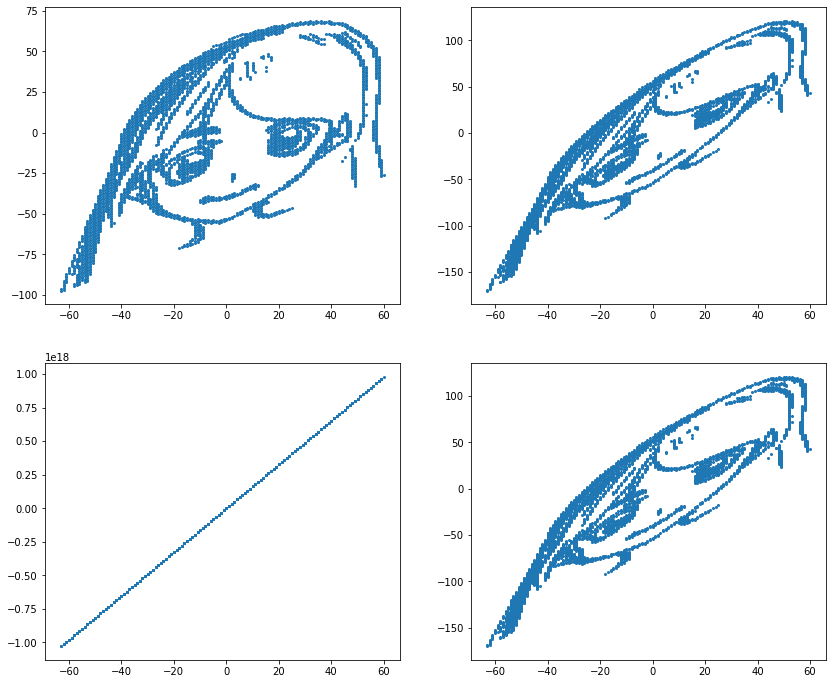

In [126]:
thetas = [np.pi / 6, np.pi / 3, np.pi / 2, 4 * np.pi / 3]

fig = plt.figure(figsize = (14, 12))

for i, theta in enumerate(thetas):
    rotated_points = np.dot(gen_skewmat(theta), character)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(
        rotated_points[0], 
        rotated_points[1], 
        linewidth = 0, 
        markersize = 2, 
        marker = "o"
    )
plt.show()